In [135]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import nltk

%matplotlib inline

# Import data without the TF-IDF Vectorization.

In [136]:
data = pd.read_csv('main_data/main_data_no_vec.csv', index_col=0)
#remove floats from tokens column
data.tokens.dropna(inplace=True)
data.shape

(39512, 11)

In [137]:
data.reset_index(inplace=True)
data['index'] = pd.to_datetime(data['index'])
data.rename(columns={'index': 'date'}, inplace=True)

In [146]:
data.head(2)

,date,update,source,author,fulltext,summary,title,cleaned_text,cleaned_authors,news_outlet,sentiment,tokens
0,2020-08-17,NaN,https://gizmodo.com/apple-renames-apple-beats-...,[],Photo : JOSH EDELSON/AFP ( Getty Images )\n\nA...,NaN,"Apple Renames Apple Beats 1 Apple Music 1, Not...",photo josh edelson afp getty images apple toda...,NaN,gizmodo,positive,"photo, image, apple, today, announced, adding,..."
1,2020-08-16,2020-08-17 21:20:26+01:00,https://www.dailymail.co.uk/sciencetech/articl...,"['Stacy Liberatore', 'Stacy Liberatore For Dai...",Apple retaliated against Epic Games after bein...,NaN,Apple bans Epic Games from App store after ant...,apple retaliated against epic games after bein...,stacy liberatore stacy liberatore for dailymai...,dailymail,positive,"apple, retaliated, epic, game, served, anti, t..."


# Dummy sentiment column

In [147]:
sentiment_dummies = pd.get_dummies(data['sentiment'], prefix='sent')
data.drop(['sentiment'], axis=1, inplace=True)
data = pd.concat([data, sentiment_dummies], axis=1)

###### We can add the sentiments to get the total articles per day. 

In [159]:
data['total_articles'] = data['sent_negative'] + data['sent_neutral'] + data['sent_positive']

# Breakdown of News Sources

#### Which news outlets produce the most articles?

In [164]:
total_articles_per_outlet = data.groupby('news_outlet')['total_articles'].sum().nlargest(10)

In [188]:
outlet = total_articles_per_outlet.index.to_list()
total_stories = total_articles_per_outlet.values

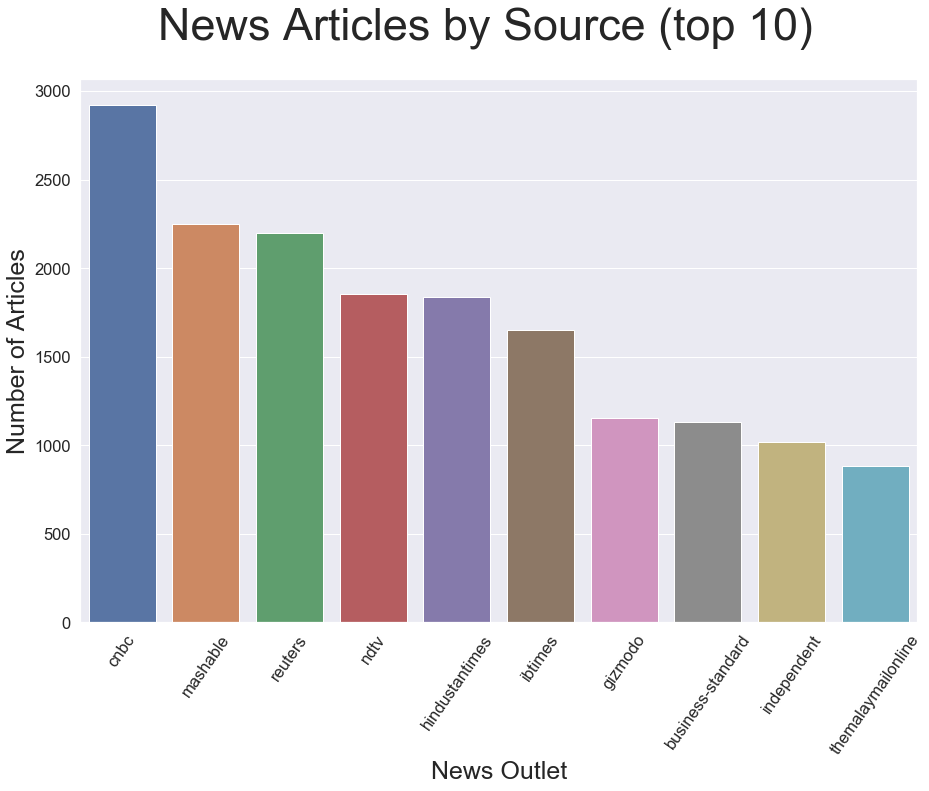

In [223]:
fig, ax = plt.subplots(figsize=(15,10))
plt.xticks(rotation=55)
sns.set(font_scale = 1.5)
sns.barplot(outlet, total_stories, ax=ax)
fig.suptitle('News Articles by Source (top 10)', fontsize=45)
plt.xlabel('News Outlet', fontsize=25)
plt.ylabel('Number of Articles', fontsize=25);

#### Top 10 news outlets giving negative coverage

In [260]:
negative_stories = data.groupby('news_outlet')['sent_negative'].sum().nlargest(10)
neg_df = pd.DataFrame(negative_stories)
neg_df.reset_index(inplace=True)

In [272]:
neg_df.news_outlet.to_list() #top negative news

['reuters',
 'cnbc',
 'ndtv',
 'hindustantimes',
 'mashable',
 'business-standard',
 'dailymail',
 'ibtimes',
 'gizmodo',
 'telegraph']

In [289]:
nega = data.loc[(data['news_outlet'] == 'reuters') |
        (data['news_outlet'] == 'cnbc') |
        (data['news_outlet'] == 'ndtv')|
        (data['news_outlet'] == 'hindustantimes')|
        (data['news_outlet'] == 'mashable')|
        (data['news_outlet'] == 'business-standard')|
        (data['news_outlet'] == 'dailymail')|
        (data['news_outlet'] == 'ibtimes')|
        (data['news_outlet'] == 'gizmodo')|
        (data['news_outlet'] == 'telegraph')]

In [293]:
positive_stories = nega.groupby('news_outlet')['sent_positive'].sum().nlargest(10)
pos_df = pd.DataFrame(positive_stories)
pos_df.reset_index(inplace=True)

In [295]:
neg_df

,news_outlet,sent_negative
0,reuters,547.0
1,cnbc,476.0
2,ndtv,372.0
3,hindustantimes,312.0
4,mashable,271.0
5,business-standard,252.0
6,dailymail,238.0
7,ibtimes,235.0
8,gizmodo,214.0
9,telegraph,191.0


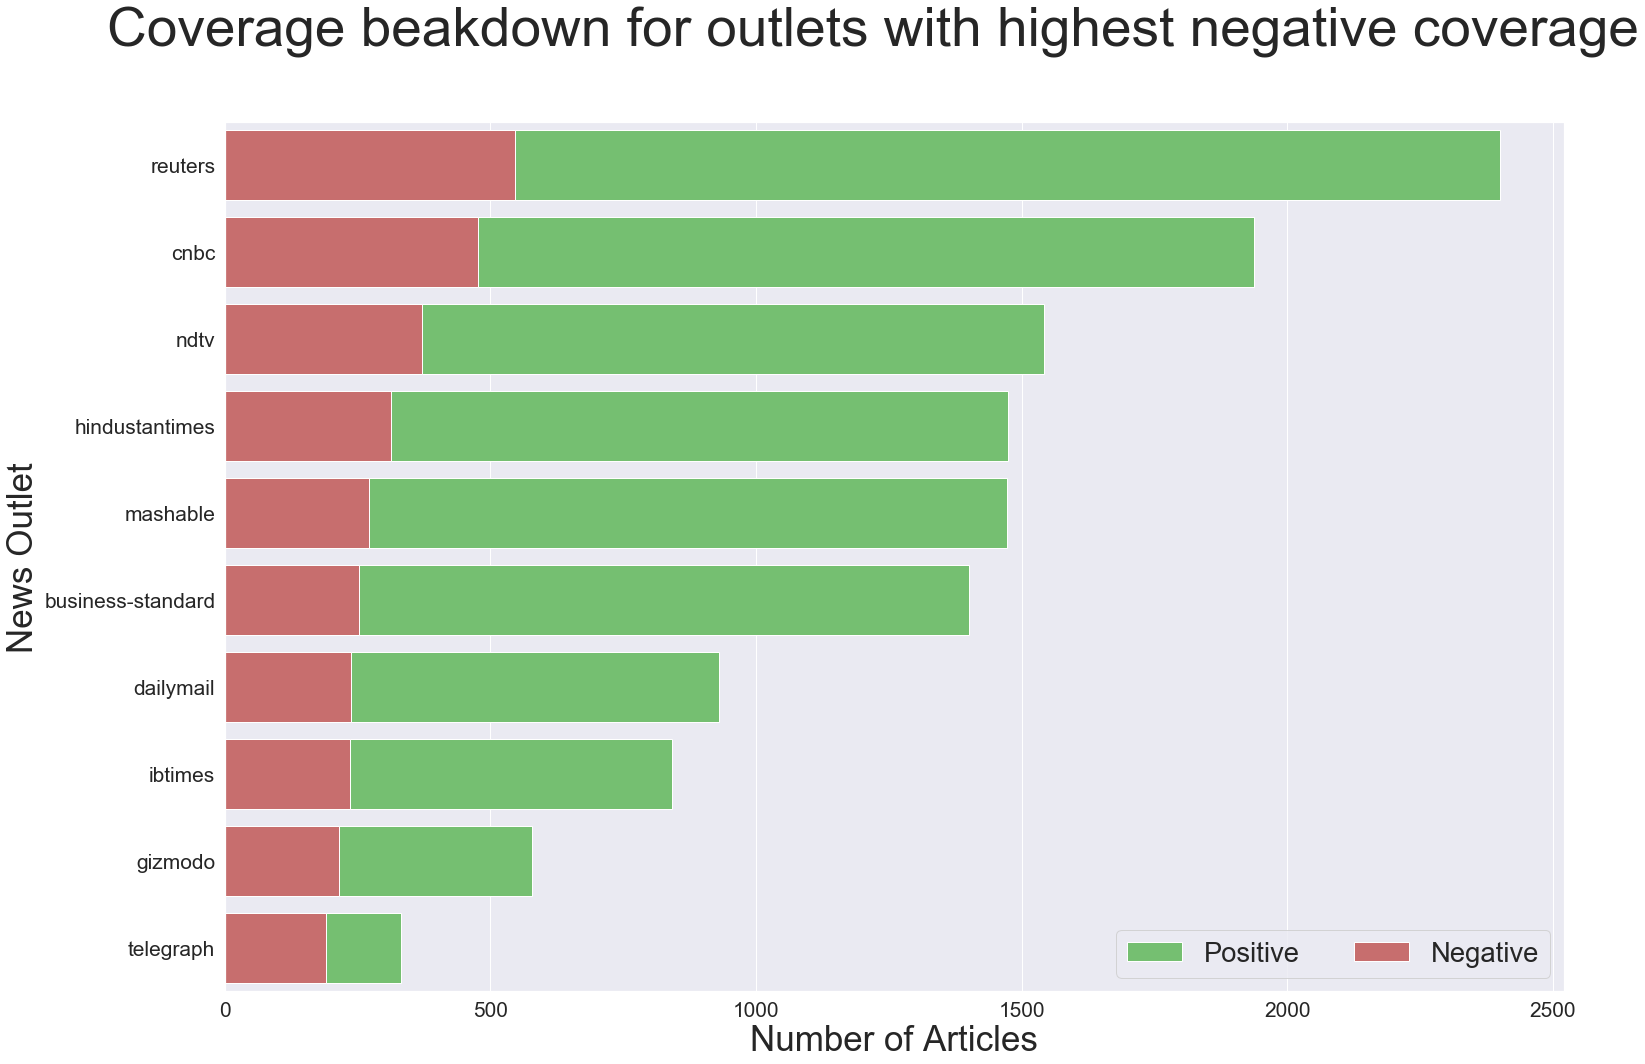

In [339]:
sns.set_context('paper')
sns.set(font_scale = 1.9)
fig, ax = plt.subplots(figsize = (24,16))
sns.set_color_codes('muted')
bar1 = sns.barplot(x = 'sent_positive', y = 'news_outlet', data = pos_df,
            label = 'Positive', color = 'g', edgecolor = 'w')
sns.set_color_codes('muted')
bar2 = sns.barplot(x = 'sent_negative', y = 'news_outlet', data = neg_df,
            label = 'Negative', color = 'r', edgecolor = 'w')
ax.legend(ncol = 2, loc = 'lower right', fontsize='large')
fig.suptitle('Coverage beakdown for outlets with highest negative coverage', fontsize=55)
plt.ylabel('News Outlet', fontsize=35)
plt.xlabel('Number of Articles', fontsize=35);
plt.show()

#### Top 10 news outlets giving positive coverage

In [342]:
positive_stories = data.groupby('news_outlet')['sent_positive'].sum().nlargest(10)
pos_df = pd.DataFrame(positive_stories)
pos_df.reset_index(inplace=True)

In [343]:
pos_df.news_outlet.to_list() #top positive news

['cnbc',
 'mashable',
 'reuters',
 'hindustantimes',
 'ndtv',
 'ibtimes',
 'gizmodo',
 'independent',
 'business-standard',
 'bgr']

In [344]:
posa = data.loc[(data['news_outlet'] == 'cnbc') |
        (data['news_outlet'] == 'mashable') |
        (data['news_outlet'] == 'reuters')|
        (data['news_outlet'] == 'hindustantimes')|
        (data['news_outlet'] == 'ndtv')|
        (data['news_outlet'] == 'ibtimes')|
        (data['news_outlet'] == 'gizmodo')|
        (data['news_outlet'] == 'independent')|
        (data['news_outlet'] == 'business-standard')|
        (data['news_outlet'] == 'bgr')]

In [345]:
negative_stories = posa.groupby('news_outlet')['sent_negative'].sum().nlargest(10)
neg_df = pd.DataFrame(negative_stories)
neg_df.reset_index(inplace=True)

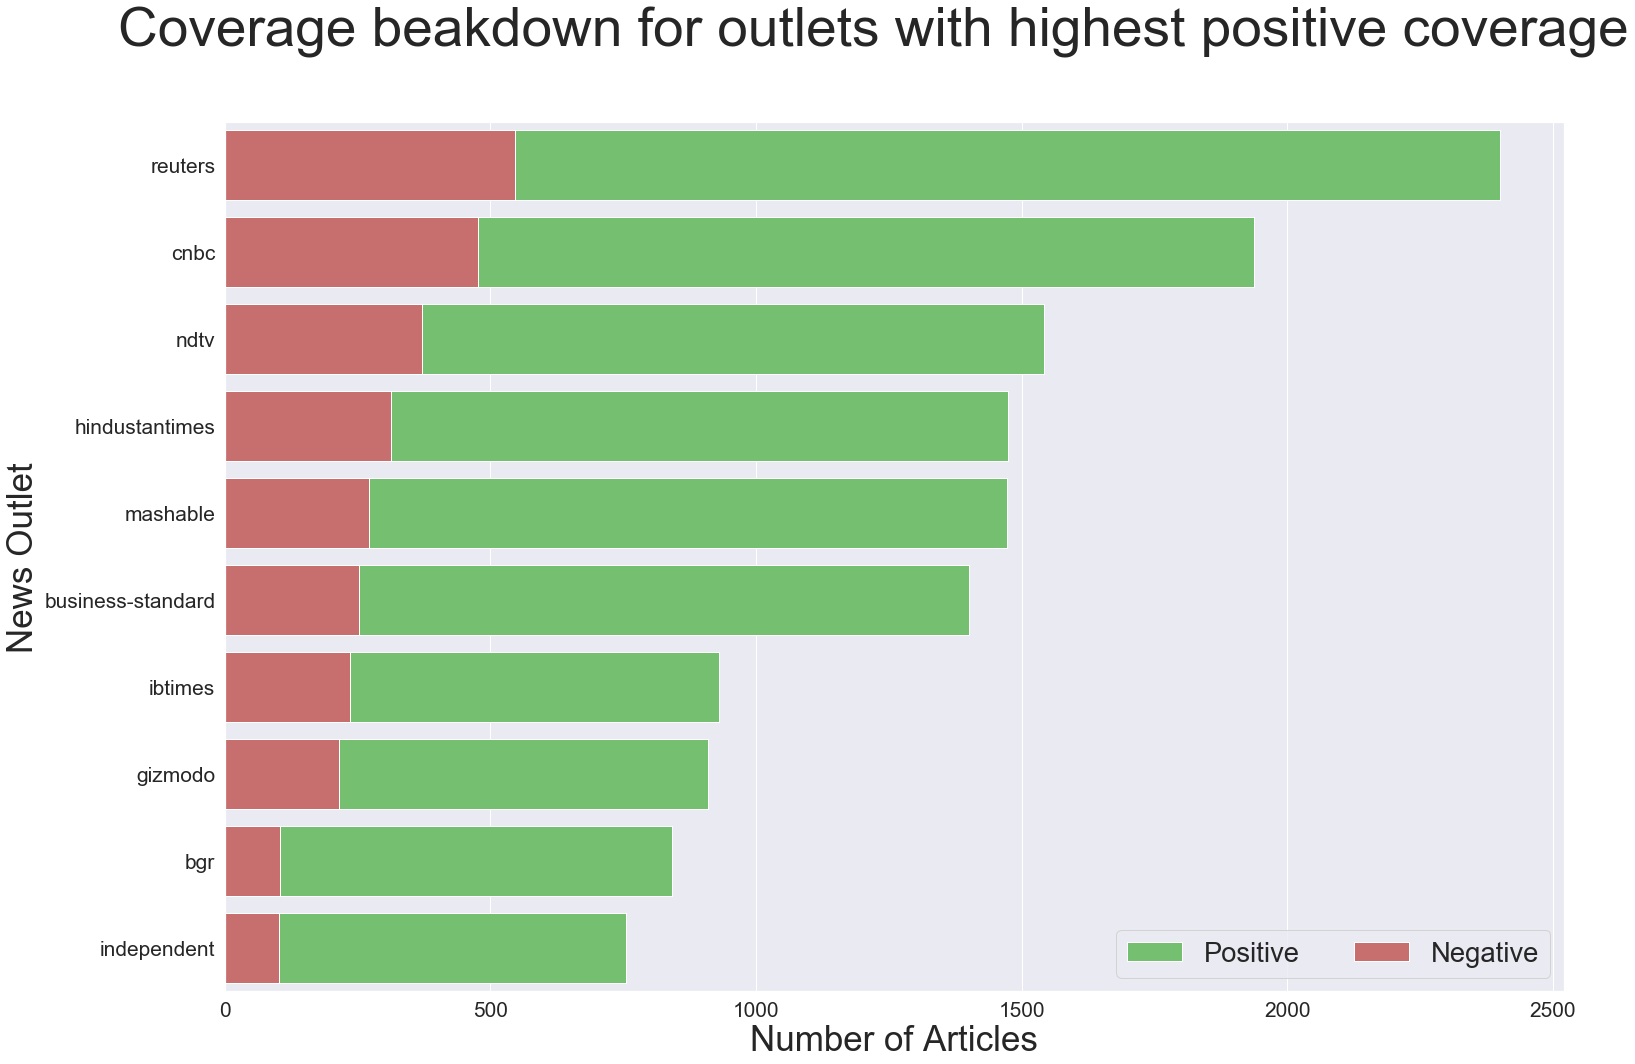

In [347]:
sns.set_context('paper')
sns.set(font_scale = 1.9)
fig, ax = plt.subplots(figsize = (24,16))
sns.set_color_codes('muted')
bar1 = sns.barplot(x = 'sent_positive', y = 'news_outlet', data = pos_df,
            label = 'Positive', color = 'g', edgecolor = 'w')
sns.set_color_codes('muted')
bar2 = sns.barplot(x = 'sent_negative', y = 'news_outlet', data = neg_df,
            label = 'Negative', color = 'r', edgecolor = 'w')
ax.legend(ncol = 2, loc = 'lower right', fontsize='large')
fig.suptitle('Coverage beakdown for outlets with highest positive coverage', fontsize=55)
plt.ylabel('News Outlet', fontsize=35)
plt.xlabel('Number of Articles', fontsize=35);
plt.show()

# Aggregate daily news articles.

We will perform modeling on the aggregated article text per day. 

In [139]:
daily_data = data.copy()

Our data is in a format that has each row as a new article, we want to aggregate all of the articles on a given day into a single row.

In [142]:
daily_articles = daily_data.groupby([pd.Grouper(key='date', freq='D')
                            ]).agg({'cleaned_text': ' '.join, 'sent_negative':np.sum,
                                   'sent_neutral':np.sum, 'sent_positive':np.sum})

In [158]:
daily_articles.head(3)

,cleaned_text,sent_negative,sent_neutral,sent_positive,total_articles
date,,,,,
2014-12-31,apple inc misleads consumers about the amount ...,2,0,2,4
2015-01-01,apple fans got much of what they asked for and...,3,0,5,8
2015-01-02,apple on friday faced a lawsuit accusing it of...,5,0,2,7
